In [30]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# classification algorithm libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

# Importing Data

In [4]:
tweet = []

username = input("Enter the keyword :")
number = int(input("NUmber of tweets :"))

for i, tweets in enumerate(sntwitter.TwitterSearchScraper(username).get_items()):
    if i > number:
        break
    
    else:
        tweet.append([tweets.date,tweets.content,tweets.user.username,tweets.url])
        
df = pd.DataFrame(tweet,columns=["Date","Tweets","Username","URL"])

Enter the keyword :chat gpt
NUmber of tweets :1000


In [5]:
df

,Date,Tweets,Username,URL
0,2023-01-04 14:16:22+00:00,ChatGPT is kind of fucked up scary. But I also...,boz_is_boz,https://twitter.com/boz_is_boz/status/16106412...
1,2023-01-04 14:16:19+00:00,I guess my work is done here 🤷🏻‍♀️ #ChatGPT ht...,tatianakoffman,https://twitter.com/tatianakoffman/status/1610...
2,2023-01-04 14:16:19+00:00,Vin fè @DJK9_ bat mw tande 🤣. #ChatGPT got it ...,marcalainb,https://twitter.com/marcalainb/status/16106412...
3,2023-01-04 14:16:18+00:00,"I tried ChatGPT earlier to try find something,...",DeanOelsch,https://twitter.com/DeanOelsch/status/16106412...
4,2023-01-04 14:16:17+00:00,jsuis en train de résumer mon cours long de 30...,nicvschase,https://twitter.com/nicvschase/status/16106412...
...,...,...,...,...
996,2023-01-04 13:21:43+00:00,@OpenAI The multilingual nature of ChatGPT is ...,mysticaltech,https://twitter.com/mysticaltech/status/161062...
997,2023-01-04 13:21:38+00:00,10 Usos Prácticos de ChatGPT 🥇 | Funcionalidad...,ByTresloucado,https://twitter.com/ByTresloucado/status/16106...
998,2023-01-04 13:21:28+00:00,@Sai_swaroopa Chat GPT is good for grunt work....,parantapah,https://twitter.com/parantapah/status/16106274...
999,2023-01-04 13:21:26+00:00,@HeyNikhila @LifeMathMoney Chatgpt,AlwaysDay1,https://twitter.com/AlwaysDay1/status/16106274...


# Data Cleaning

In [13]:
stop_words = set(stopwords.words('english'))
wnl = WordNetLemmatizer()

In [14]:
def clean_data(df,col,clean_col):
    df[clean_col] = df[col].apply(lambda x: x.lower()) #to lower case
    df[clean_col] = df[clean_col].apply(lambda x: re.sub(' +',' ',x)) #remove extra spaces
    df[clean_col] = df[clean_col].apply(lambda x: re.sub(r'@[a-zA-z0-9]+',' ',x))
    df[clean_col] = df[clean_col].apply(lambda x: re.sub('[^a-zA-z]',' ',x)) # remove punctuation
    df[clean_col] = df[clean_col].apply(lambda x: ' '.join(wnl.lemmatize(text) for text in x.split() if text not in (stop_words))) #lemmatize + removal of stop words
    
    return df  

In [15]:
clean_df = clean_data(df,"Tweets","clean_tweets")

In [16]:
df1 = clean_df[["Tweets","clean_tweets"]]
df1

,Tweets,clean_tweets
0,ChatGPT is kind of fucked up scary. But I also...,chatgpt kind fucked scary also think also one ...
1,I guess my work is done here 🤷🏻‍♀️ #ChatGPT ht...,guess work done chatgpt http co ajt tihkt
2,Vin fè @DJK9_ bat mw tande 🤣. #ChatGPT got it ...,vin f bat mw tande chatgpt got wrong kote http...
3,"I tried ChatGPT earlier to try find something,...",tried chatgpt earlier try find something anyth...
4,jsuis en train de résumer mon cours long de 30...,jsuis en train de r sumer mon cours long de pa...
...,...,...
996,@OpenAI The multilingual nature of ChatGPT is ...,multilingual nature chatgpt absolutely amazing...
997,10 Usos Prácticos de ChatGPT 🥇 | Funcionalidad...,usos pr cticos de chatgpt funcionalidades para...
998,@Sai_swaroopa Chat GPT is good for grunt work....,chat gpt good grunt work recommend writing boo...
999,@HeyNikhila @LifeMathMoney Chatgpt,chatgpt


In [17]:
# funct to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# funct to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df1['subjectivity'] = df1['clean_tweets'].apply(getSubjectivity)
df1['polarity'] = df1['clean_tweets'].apply(getPolarity)

C:\Users\Meetul\AppData\Local\Temp\ipykernel_3220\777713581.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['subjectivity'] = df1['clean_tweets'].apply(getSubjectivity)
C:\Users\Meetul\AppData\Local\Temp\ipykernel_3220\777713581.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['polarity'] = df1['clean_tweets'].apply(getPolarity)


In [18]:
df1

,Tweets,clean_tweets,subjectivity,polarity
0,ChatGPT is kind of fucked up scary. But I also...,chatgpt kind fucked scary also think also one ...,0.629464,0.173214
1,I guess my work is done here 🤷🏻‍♀️ #ChatGPT ht...,guess work done chatgpt http co ajt tihkt,0.000000,0.000000
2,Vin fè @DJK9_ bat mw tande 🤣. #ChatGPT got it ...,vin f bat mw tande chatgpt got wrong kote http...,0.900000,-0.500000
3,"I tried ChatGPT earlier to try find something,...",tried chatgpt earlier try find something anyth...,0.600000,0.360000
4,jsuis en train de résumer mon cours long de 30...,jsuis en train de r sumer mon cours long de pa...,0.400000,-0.050000
...,...,...,...,...
996,@OpenAI The multilingual nature of ChatGPT is ...,multilingual nature chatgpt absolutely amazing...,0.300000,0.300000
997,10 Usos Prácticos de ChatGPT 🥇 | Funcionalidad...,usos pr cticos de chatgpt funcionalidades para...,1.000000,-0.600000
998,@Sai_swaroopa Chat GPT is good for grunt work....,chat gpt good grunt work recommend writing boo...,0.586905,0.495238
999,@HeyNikhila @LifeMathMoney Chatgpt,chatgpt,0.000000,0.000000


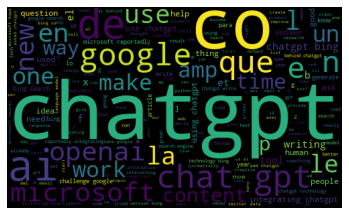

In [58]:
allwords = ' '.join([twts for twts in df1['clean_tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allwords)
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

In [21]:
# funct to compute positive, negative and neutral analysis

def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df1['Analysis'] = df1['polarity'].apply(getAnalysis)
df1.head()

C:\Users\Meetul\AppData\Local\Temp\ipykernel_3220\212670031.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Analysis'] = df1['polarity'].apply(getAnalysis)


,Tweets,clean_tweets,subjectivity,polarity,Analysis
0,ChatGPT is kind of fucked up scary. But I also...,chatgpt kind fucked scary also think also one ...,0.629464,0.173214,Positive
1,I guess my work is done here 🤷🏻‍♀️ #ChatGPT ht...,guess work done chatgpt http co ajt tihkt,0.000000,0.000000,Neutral
2,Vin fè @DJK9_ bat mw tande 🤣. #ChatGPT got it ...,vin f bat mw tande chatgpt got wrong kote http...,0.900000,-0.500000,Negative
3,"I tried ChatGPT earlier to try find something,...",tried chatgpt earlier try find something anyth...,0.600000,0.360000,Positive
4,jsuis en train de résumer mon cours long de 30...,jsuis en train de r sumer mon cours long de pa...,0.400000,-0.050000,Negative


In [22]:
df1['Analysis'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [23]:
# percentage of positive and negative reviews

ptweets = df1[df1['Analysis'] == 'Positive']
neutweets = df1[df1['Analysis'] == 'Neutral']
ntweets = df1[df1['Analysis'] == 'Negative']

print("Total Percentage of positive tweets = ",round((ptweets.shape[0] /  df1.shape[0]) * 100,2))
print("Total Percentage of Negative tweets = ",round((ntweets.shape[0] /  df1.shape[0]) * 100,2))
print("Total Percentage of Neutarl tweets = ",round((neutweets.shape[0] /  df1.shape[0]) * 100,2))
#ntweets.shape[0]

Total Percentage of positive tweets =  31.77
Total Percentage of Negative tweets =  9.69
Total Percentage of Neutarl tweets =  58.54


# WordEmbedding

In [45]:
cv = CountVectorizer(max_df=0.90,min_df=2)
corpus = df1['clean_tweets']

In [46]:
X = cv.fit_transform(corpus)

In [47]:
cv_df = pd.DataFrame(X.toarray(),columns=cv.get_feature_names())
cv_df[:10]

C:\Users\Meetul\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aapl,aber,ability,able,absolute,absolutely,academia,access,accessible,...,yes,yet,yg,yo,youtube,yr,zde,zeka,zero,zu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
final_cv_df = cv_df.join(df1['Analysis'])
final_cv_df.head()

,aa,aapl,aber,ability,able,absolute,absolutely,academia,access,accessible,...,yet,yg,yo,youtube,yr,zde,zeka,zero,zu,Analysis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Neutral
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negative
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negative


In [49]:
le = LabelEncoder()

In [50]:
final_cv_df['Analysis'] = le.fit_transform(final_cv_df["Analysis"])
final_cv_df

,aa,aapl,aber,ability,able,absolute,absolutely,academia,access,accessible,...,yet,yg,yo,youtube,yr,zde,zeka,zero,zu,Analysis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
final_cv_df["Analysis"].unique()

array([2, 1, 0])

0 = Negative, 1 = Neutral, 2 = Positive

### WordCloud for all Negative Tweets:

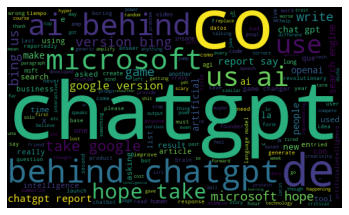

In [63]:
allwords = ' '.join([twts for twts in df1['clean_tweets'][final_cv_df['Analysis']==0]])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allwords)
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

### WordCloud for all Neutral Tweets:

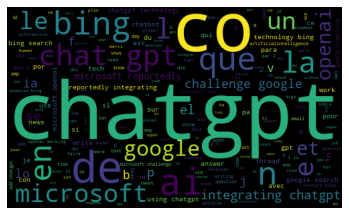

In [64]:
allwords = ' '.join([twts for twts in df1['clean_tweets'][final_cv_df['Analysis']==1]])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allwords)
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

### WordCloud for all Positive Tweets:

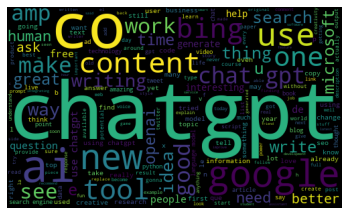

In [65]:
allwords = ' '.join([twts for twts in df1['clean_tweets'][final_cv_df['Analysis']==2]])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allwords)
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

# Model Training

In [52]:
X = final_cv_df.drop(["Analysis"],axis=1)
X

,aa,aapl,aber,ability,able,absolute,absolutely,academia,access,accessible,...,yes,yet,yg,yo,youtube,yr,zde,zeka,zero,zu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
y = final_cv_df["Analysis"]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size=0.2)

In [55]:
X_train

,aa,aapl,aber,ability,able,absolute,absolutely,academia,access,accessible,...,yes,yet,yg,yo,youtube,yr,zde,zeka,zero,zu
250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
969,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
908,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
def class_model(X_train, X_test, y_train, y_test):
    
    print(""" Choose any one -
    1. Logistic Regression
    2. Decision Tree
    3. SVM
    4. Naive Bayes
    5. KNN
    0. Run all of the above""")
    n = int(input("Enter your choice : "))
    
    if n == 1 or n == 0:
        a = LogisticRegression()
        a.fit(X_train,y_train)
        print("Accuracy of Logistic Regression Model : ",a.score(X_test,y_test))
        
    if n == 2 or n == 0:
        s = DecisionTreeClassifier()
        s.fit(X_train,y_train)
        print("Accuracy of Decision Tree Classifier Model :",s.score(X_test,y_test))
        
    if n == 3 or n == 0:
        d = SVC()
        d.fit(X_train,y_train)
        print("Accuracy of SVM Classifier Model :",d.score(X_test,y_test))
        
    if n == 4 or n == 0:
        f = MultinomialNB()
        f.fit(X_train,y_train)
        print("Accuracy of Naive Bayes Classifier Model :",f.score(X_test,y_test))
    
    if n == 5 or n == 0:
        g = KNeighborsClassifier()
        g.fit(X_train,y_train)
        print("Accuracy of KNN Classifier Model :",g.score(X_test,y_test))


In [57]:
class_model(X_train, X_test, y_train, y_test)

 Choose any one -
    1. Logistic Regression
    2. Decision Tree
    3. SVM
    4. Naive Bayes
    5. KNN
    0. Run all of the above
Enter your choice : 0
Accuracy of Logistic Regression Model :  0.7562189054726368
Accuracy of Decision Tree Classifier Model : 0.7164179104477612
Accuracy of SVM Classifier Model : 0.7014925373134329
Accuracy of Naive Bayes Classifier Model : 0.7661691542288557
Accuracy of KNN Classifier Model : 0.5671641791044776
